# Tutorial on PCA

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch

dir = os.path.abspath('../')
if not dir in sys.path: sys.path.append(dir)

from snputils.snp.io.read import VCFReader
from snputils.processing import PCA

### 1. Load SNP Data

Load the SNP data from a VCF file and initialize it for PCA.

In [2]:
# Load genotype data from VCF file
reader = VCFReader('../data/vcf/subset.vcf')
snpobj = reader.read(sum_strands=False)

### 2. PCA with Scikit-Learn Backend

Perform PCA using `PCA` with `sklearn` backend.

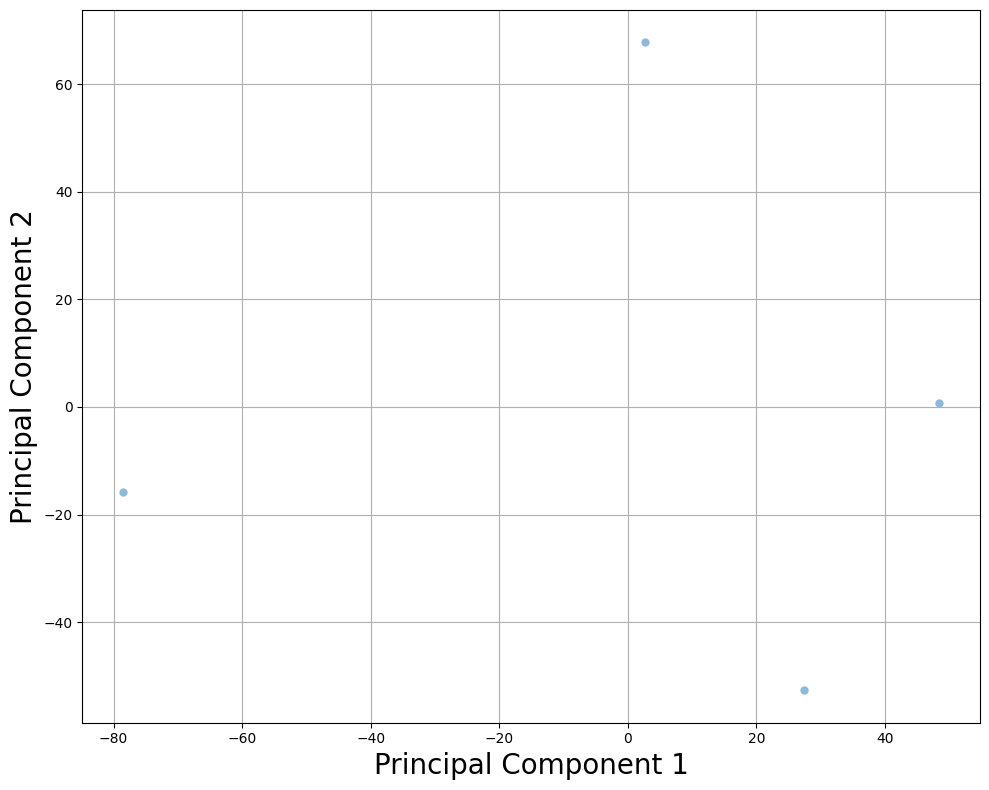

In [3]:
# Initialize PCA with sklearn backend and 2 principal components
pca = PCA(backend="sklearn", n_components=2)

# Perform PCA on the SNP data
components = pca.fit_transform(snpobj)

# Create DataFrame for the PCA components
df = pd.DataFrame({
    "Principal Component 1": components[:, 0],
    "Principal Component 2": components[:, 1]
})
df.head()

# Visualize the PCA components in a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.tight_layout()
plt.show()

###  fit() and then transform()

In [4]:
pca = PCA(backend="sklearn", n_components=2)
pca.fit(snpobj)
components = pca.transform(snpobj)

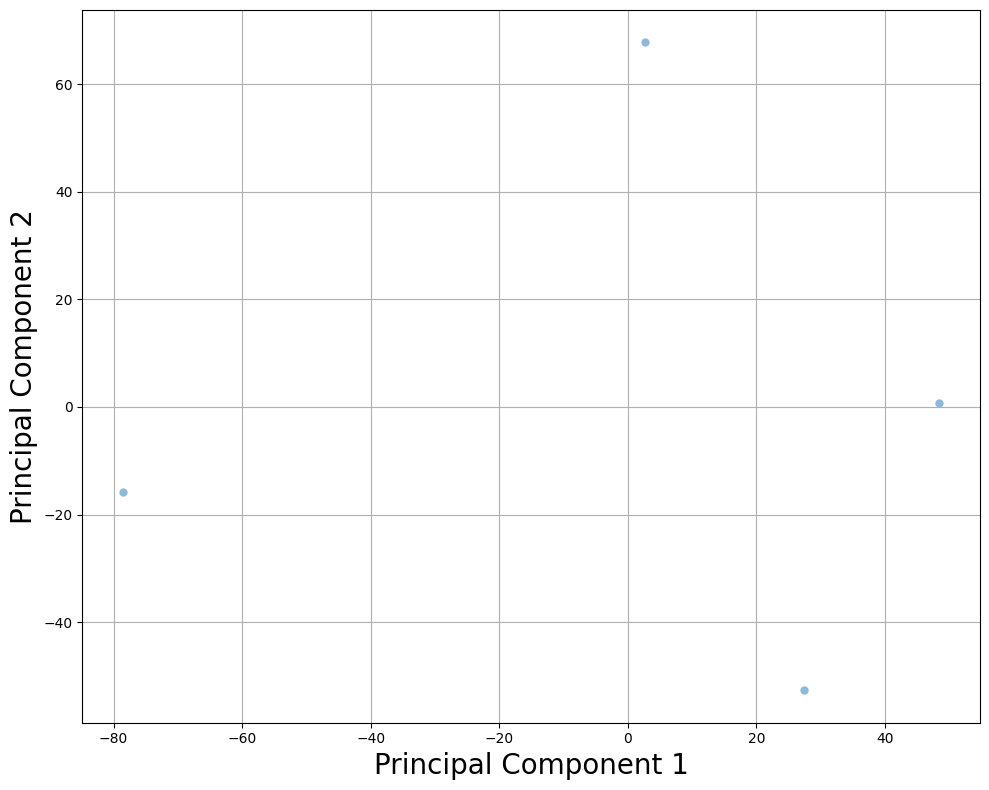

In [5]:
df = pd.DataFrame({
    "Principal Component 1": components[:,0],
    "Principal Component 2": components[:,1],
})

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.tight_layout()
plt.show()

### 3. Separate fit() and transform() Functions

Use separate `fit()` and `transform()` methods to apply PCA on the same data.

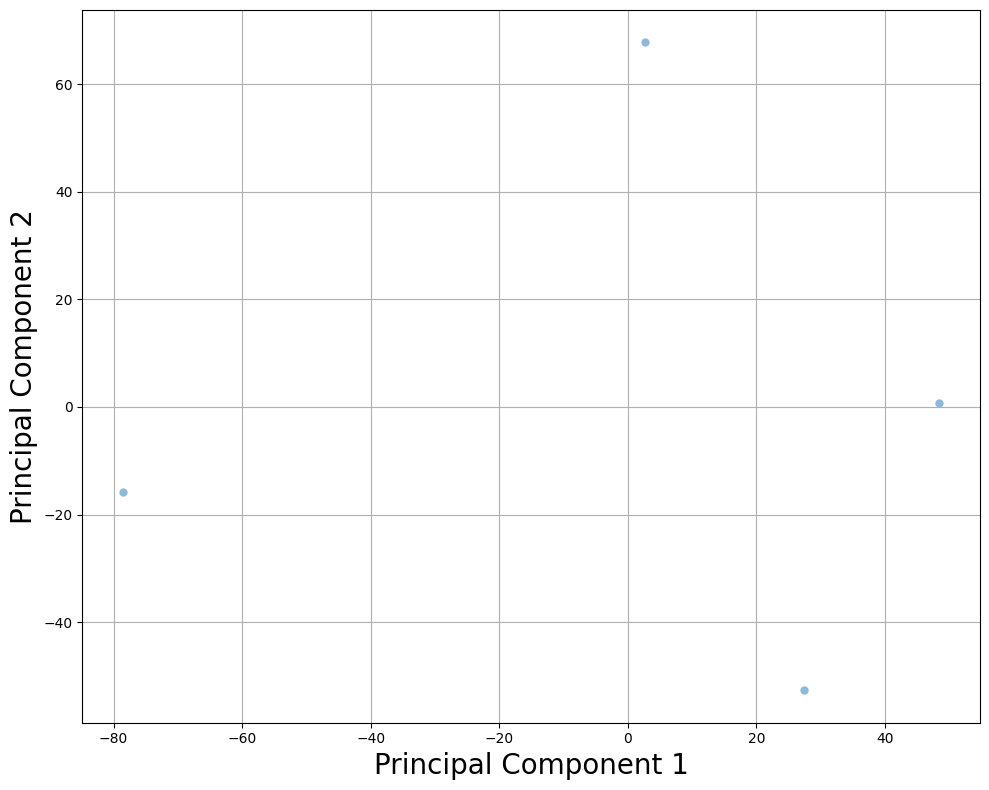

In [6]:
# Initialize PCA and fit the model
pca = PCA(backend="sklearn", n_components=2)
pca.fit(snpobj)

# Transform the SNP data using the fitted model
components = pca.transform(snpobj)

# Visualize the PCA results
df = pd.DataFrame({
    "Principal Component 1": components[:, 0],
    "Principal Component 2": components[:, 1]
})
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.tight_layout()
plt.show()

### 4. Separate Strands into Independent Samples

Separate maternal and paternal strands and treat them as independent samples.

Shape of PCA components with separate strands: (8, 2)


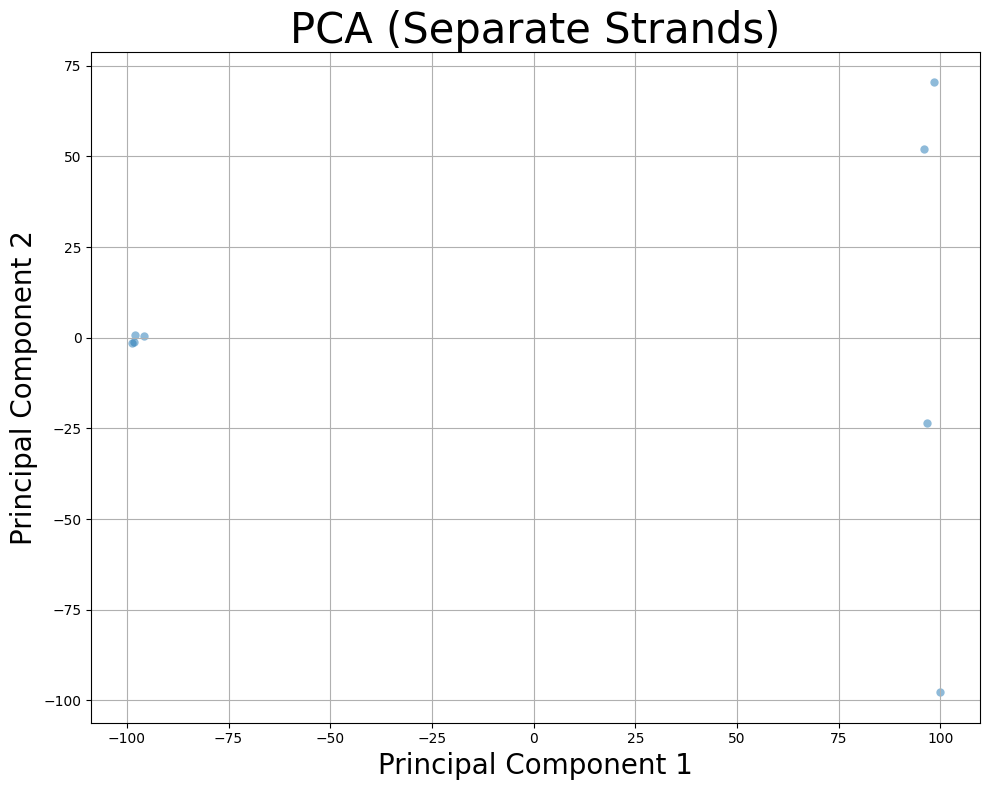

In [7]:
# Perform PCA with separate strands
pca = PCA(backend="sklearn", n_components=2)
components = pca.fit_transform(snpobj, average_strands=False)
print("Shape of PCA components with separate strands:", components.shape)

# Create DataFrame and plot
df = pd.DataFrame({
    "Principal Component 1": components[:, 0],
    "Principal Component 2": components[:, 1]
})
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("PCA (Separate Strands)", fontsize=30)
plt.tight_layout()
plt.show()

### 5. Subset of Samples

Perform PCA on a subset of samples to optimize performance.

Shape of PCA components with subset of samples: (4, 2)


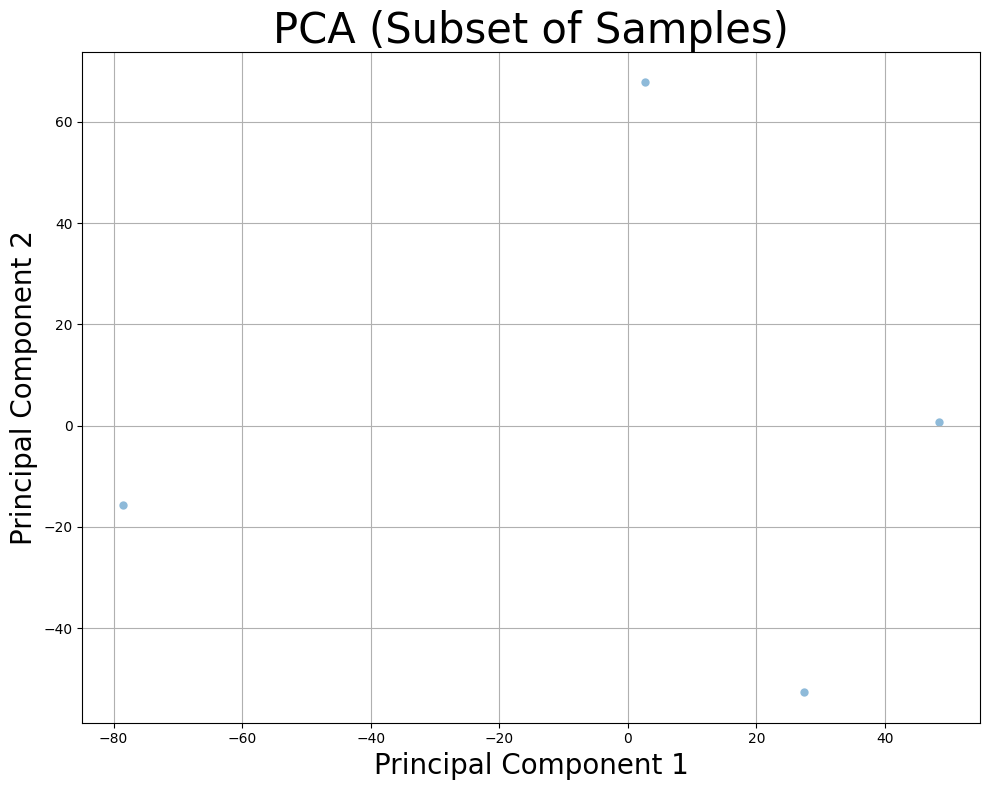

In [8]:
# Perform PCA on a subset of samples
pca = PCA(backend="sklearn", n_components=2)
components = pca.fit_transform(snpobj, samples_subset=100)
print("Shape of PCA components with subset of samples:", components.shape)

# Plot results
df = pd.DataFrame({
    "Principal Component 1": components[:, 0],
    "Principal Component 2": components[:, 1]
})
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("PCA (Subset of Samples)", fontsize=30)
plt.tight_layout()
plt.show()

### 6. Subset of SNPs

Perform PCA on a specific subset of SNPs.

Shape of PCA components with subset of SNPs: (4, 2)


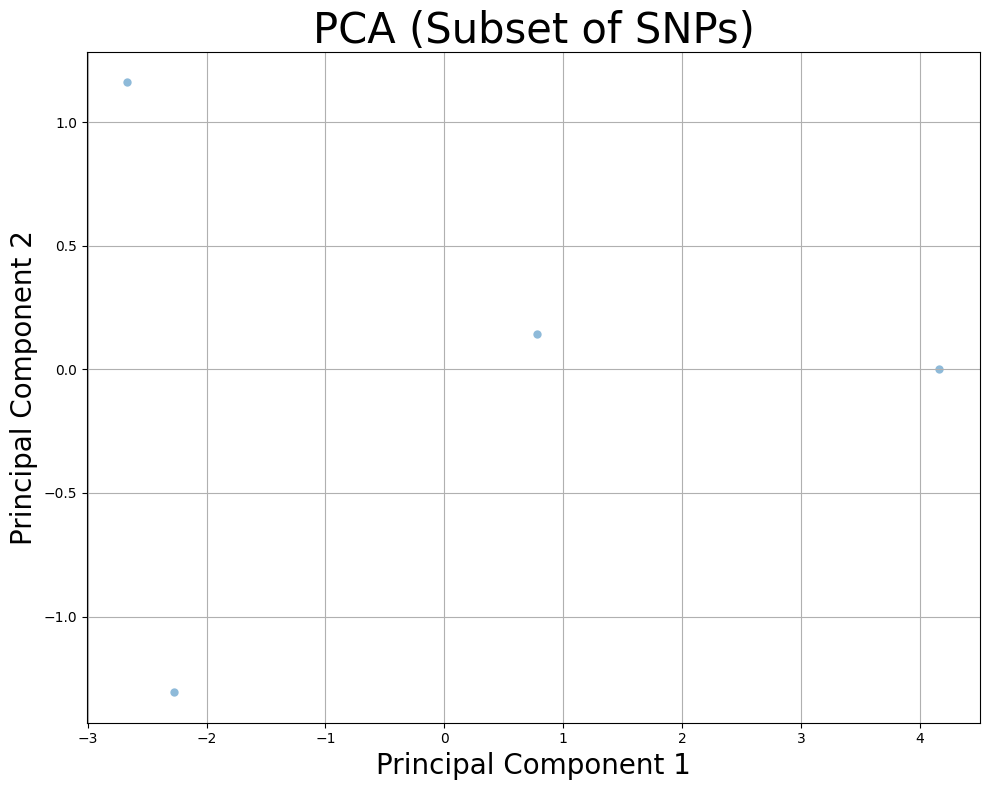

In [9]:
# Perform PCA on a subset of SNPs
pca = PCA(backend="sklearn", n_components=2)
components = pca.fit_transform(snpobj, snps_subset=500)
print("Shape of PCA components with subset of SNPs:", components.shape)

# Create DataFrame and plot
df = pd.DataFrame({
    "Principal Component 1": components[:, 0],
    "Principal Component 2": components[:, 1]
})
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("PCA (Subset of SNPs)", fontsize=30)
plt.tight_layout()
plt.show()

### 7. Subset of Both Samples and SNPs

Perform PCA on both a subset of samples and a subset of SNPs.

Shape of PCA components with subset of samples and SNPs: (4, 2)


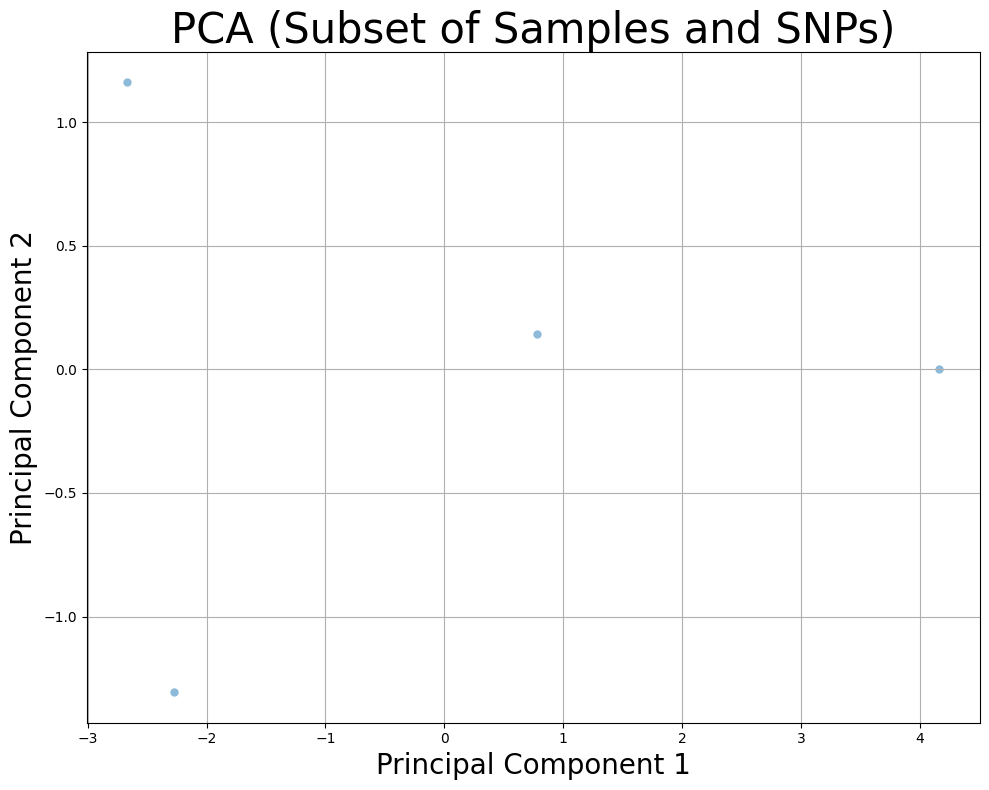

In [10]:
# Perform PCA on subset of samples and subset of SNPs
pca = PCA(backend="sklearn", n_components=2)
components = pca.fit_transform(snpobj, snps_subset=500, samples_subset=50)
print("Shape of PCA components with subset of samples and SNPs:", components.shape)

# Plot the results
df = pd.DataFrame({
    "Principal Component 1": components[:, 0],
    "Principal Component 2": components[:, 1]
})
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("PCA (Subset of Samples and SNPs)", fontsize=30)
plt.tight_layout()
plt.show()

### 8. GPU-Optimized: TorchPCA with PCA

If CUDA is available, use the pytorch backend for efficient computation on GPU. Use subsets of data when running on GPU to avoid memory overflow.

Using sklearn backend


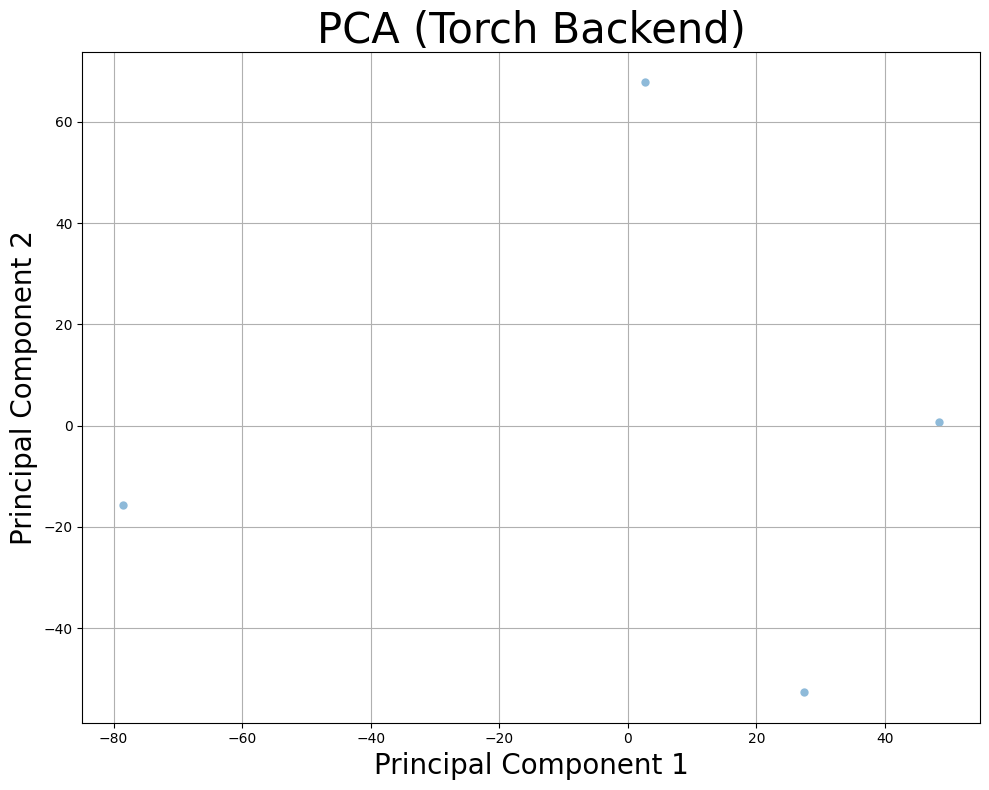

In [11]:
# Choose backend based on device availability
backend = "pytorch" if torch.cuda.is_available() else "sklearn"
print(f"Using {backend} backend")

# Initialize PCA with 2 components
pca = PCA(backend=backend, n_components=2)

# Fit and transform with a subset of samples
pca.fit(snpobj, samples_subset=100)
components = pca.transform(snpobj, samples_subset=100)

# Plot the PCA results
df = pd.DataFrame({
    "Principal Component 1": components[:, 0],
    "Principal Component 2": components[:, 1]
})
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("PCA (Torch Backend)", fontsize=30)
plt.tight_layout()
plt.show()

### 9. Low-Rank PCA

Use low-rank approximation for large datasets.

In [12]:
# Perform low-rank PCA with `sklearn` backend for large datasets
pca = PCA(backend="sklearn", n_components=2, fitting="lowrank")
pca.fit(snpobj)
components = pca.transform(snpobj, samples_subset=100)

### 10. Separate Strands with Subset of SNPs

Separate maternal and paternal strands with a subset of SNPs.

Shape of PCA components with separate strands and subset of SNPs: (8, 2)


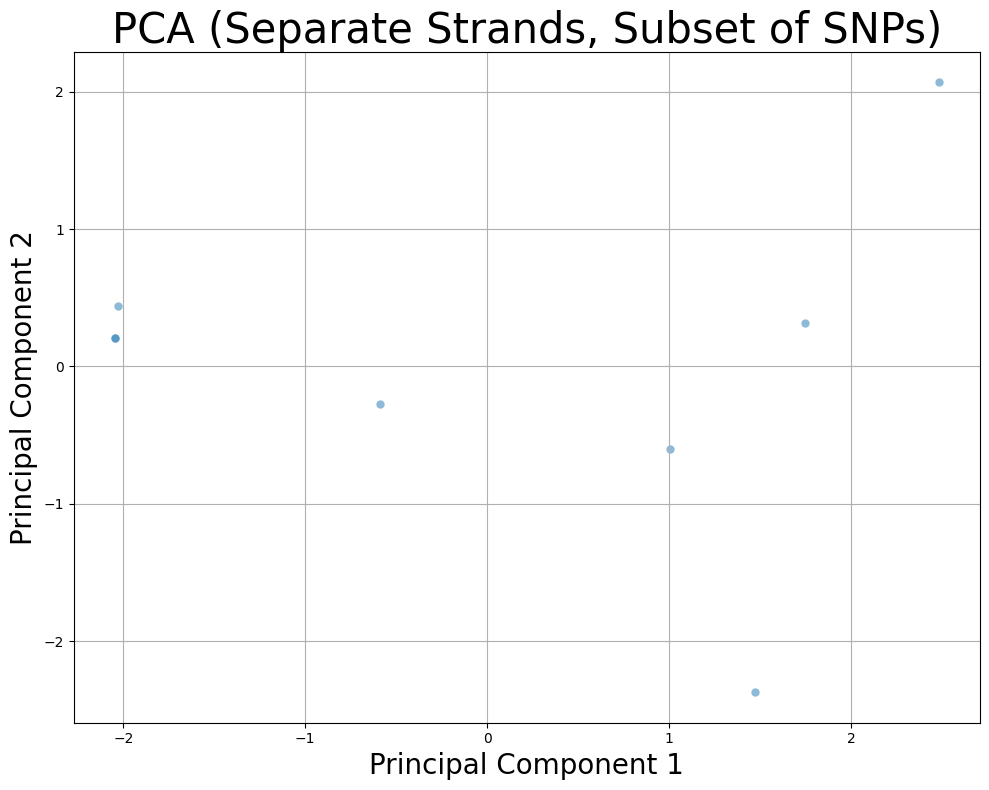

In [13]:
# Perform PCA with separate strands and a subset of SNPs
pca = PCA(backend="sklearn", n_components=2)
components = pca.fit_transform(snpobj, average_strands=False, snps_subset=200)
print("Shape of PCA components with separate strands and subset of SNPs:", components.shape)

# Create DataFrame and plot
df = pd.DataFrame({
    "Principal Component 1": components[:, 0],
    "Principal Component 2": components[:, 1]
})
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Principal Component 1", y="Principal Component 2", linewidth=0, alpha=0.5)
plt.grid()
plt.xlabel("Principal Component 1", fontsize=20)
plt.ylabel("Principal Component 2", fontsize=20)
plt.title("PCA (Separate Strands, Subset of SNPs)", fontsize=30)
plt.tight_layout()
plt.show()